# Customer Segmentation

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import datetime 

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
uniq_edu = df['Education'].unique()
uniq_marital = df['Marital_Status'].unique()

print(uniq_edu)
print(uniq_marital)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
# Marital Status field is unstructured

df['Marital_Status'] = df['Marital_Status'].replace({'YOLO':'Other', 'Absurd':'Other', 'Together': 'In a Relationship', 'Alone': 'Single'})


In [8]:
# Restructiring of the Education column

df['Education'] = df['Education'].replace( {'Basic':'Elementery School', '2n Cycle': 'High School', 'Graduation':'College'} )

In [9]:
# Create total spent column
df['Total_spent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

## Data Cleaning

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_spent             0
dtype: int64

In [12]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_spent
10,1994,1983,College,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,0,3,11,0,19
27,5255,1986,College,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,0,3,11,0,637
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,0,3,11,0,186
48,7244,1951,College,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,0,3,11,0,124
58,8557,1982,College,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,0,3,11,0,46
71,10629,1973,High School,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,0,3,11,0,109
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,0,3,11,0,603
91,9235,1957,College,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,0,3,11,0,18
92,5798,1973,Master,In a Relationship,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,0,3,11,0,985
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,0,3,11,0,404


In [13]:
# Replace missing income values with Income Median Value
df['Income'] = df['Income'].fillna(df['Income'].median())

In [14]:
df.duplicated().sum()

0

In [15]:
# Create new Column Age based on Year born
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_spent,Age
0,5524,1957,College,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,66
1,2174,1954,College,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,69
2,4141,1965,College,In a Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,58
3,6182,1984,College,In a Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,42


## EDA

### Univariet analysis

In [16]:
# Analyse Age
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

<AxesSubplot:>

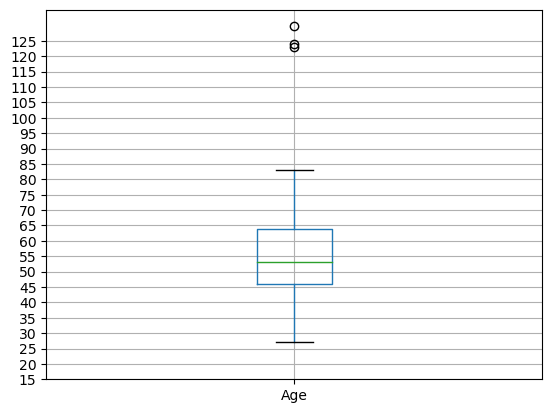

In [17]:
df['Age'].plot(kind='box',yticks=range(15,130,5),grid=True)

<AxesSubplot:ylabel='Frequency'>

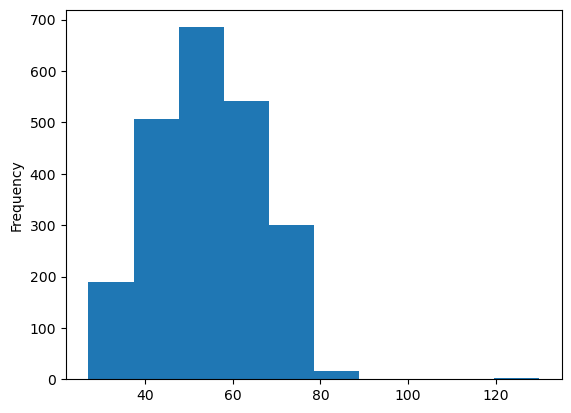

In [18]:
df['Age'].plot(kind='hist')

<AxesSubplot:xlabel='Age', ylabel='Density'>

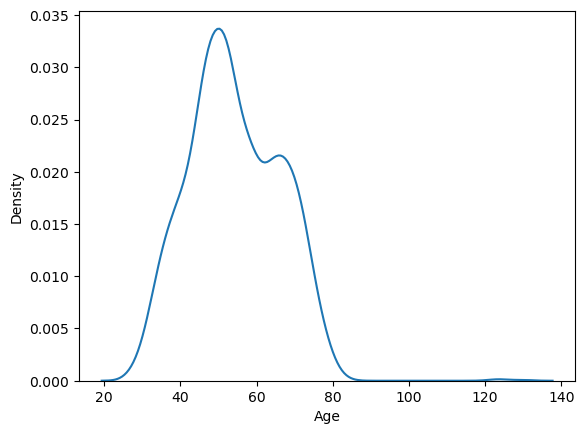

In [19]:
sns.kdeplot(data=df['Age'])

In [20]:
# Income

In [21]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

7705.92

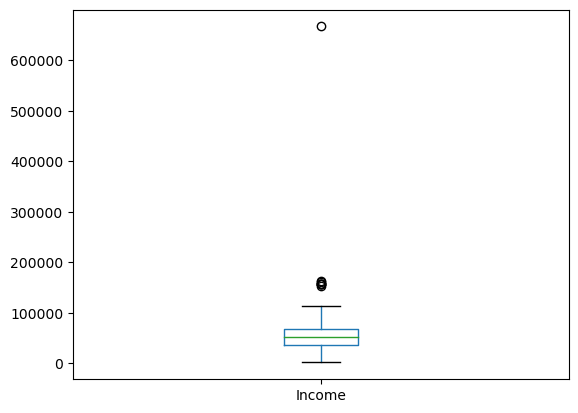

In [22]:
df['Income'].plot(kind='box')
df['Income'].quantile(0.99)
df['Income'].quantile(0.01)

count     2217.000000
mean     51308.840325
std      20289.975267
min       1730.000000
25%      35322.000000
50%      51381.500000
75%      67546.000000
max      94384.000000
Name: Income, dtype: float64

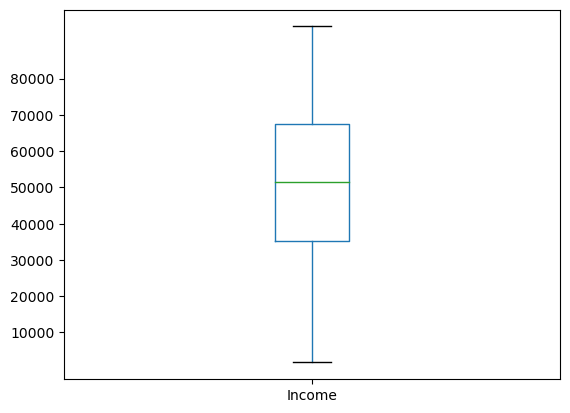

In [23]:
# Remove outlier
income_subset = df[(df['Income'] < df['Income'].quantile(0.99))]['Income']
income_subset.plot(kind='box',yticks=range(10000,90000,10000))
income_subset.describe()

<AxesSubplot:ylabel='Frequency'>

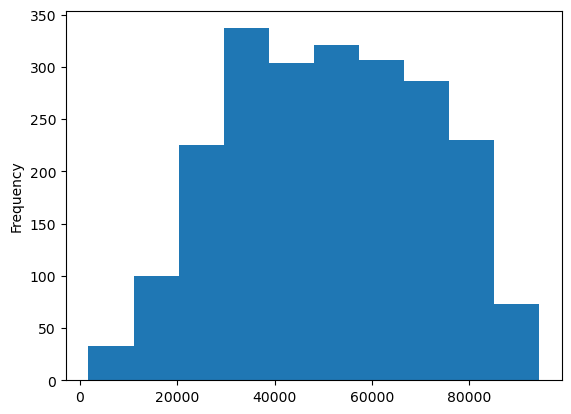

In [24]:
income_subset.plot(kind='hist')

<AxesSubplot:xlabel='Income', ylabel='Density'>

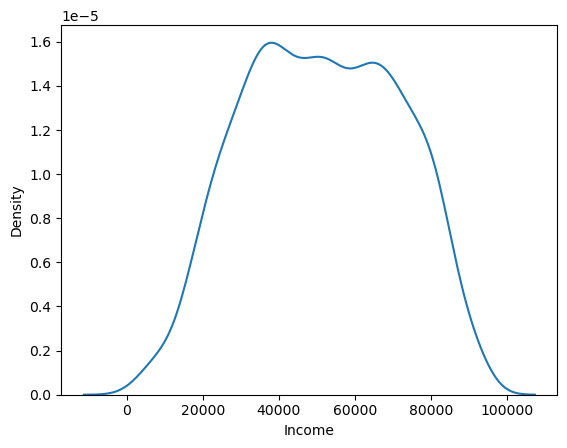

In [25]:
sns.kdeplot(data=income_subset)

In [26]:
income_subset.skew()

-0.028812480311056494

<AxesSubplot:xlabel='Education'>

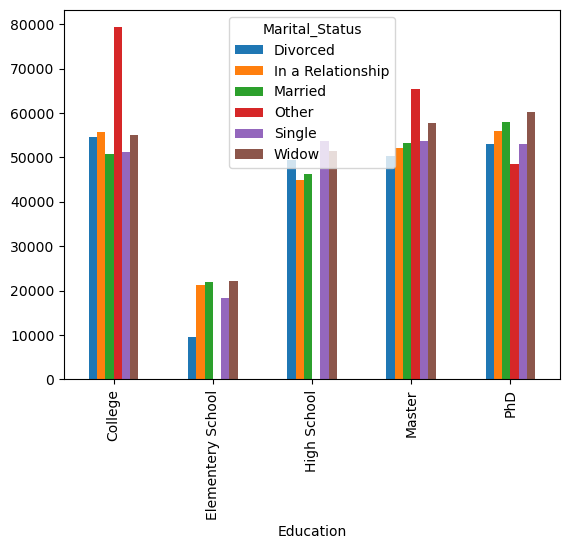

In [28]:
# Relatiosnhip between edeucation and income
df.groupby(['Education','Marital_Status'])['Income'].aggregate('mean').unstack()

df.pivot_table('Income', index='Education', columns='Marital_Status',aggfunc='mean').plot(kind='bar')

<AxesSubplot:>

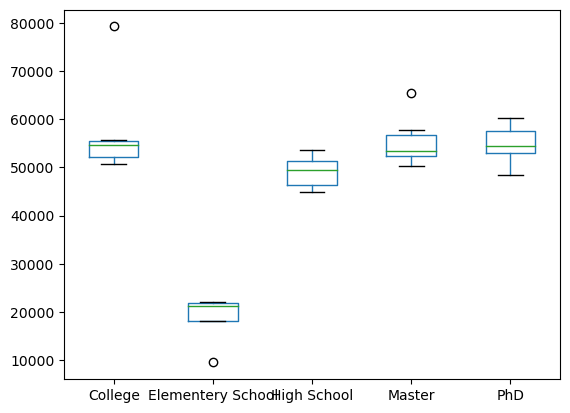

In [29]:
df.pivot_table('Income',index='Marital_Status',columns='Education',aggfunc='mean').plot(kind='box')

<AxesSubplot:xlabel='Income', ylabel='Education'>

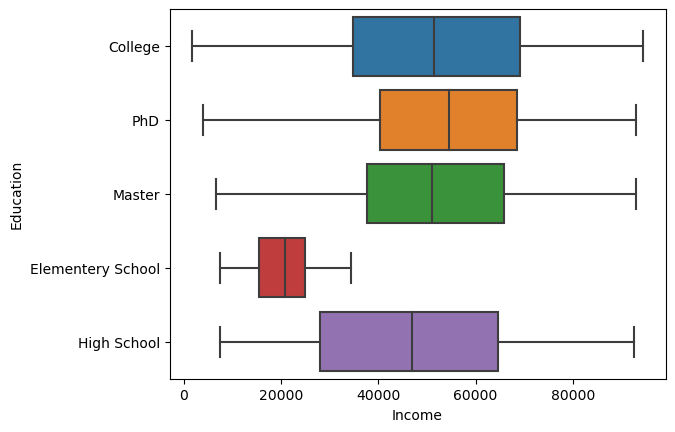

In [73]:
#df[df['Education']=='College']['Income'].plot(kind='box',subplots=True)
#df[df['Education']=='Master']['Income'].plot(kind='box',subplots=True)

sns.boxplot(df, x=income_subset,y='Education')

In [31]:
# Education and Income    
income_grouped =pd.cut(df['Income'],[1000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])
income_bracket_count = pd.DataFrame(df.pivot_table('Income', index='Education', columns=income_grouped,aggfunc='count'))
income_bracket_count=income_bracket_count.transpose()

for i in income_bracket_count:
    count_sum = income_bracket_count[i].sum()
    income_bracket_count[i] = income_bracket_count[i].fillna(0)
    income_bracket_count[i] = income_bracket_count[i].apply(lambda x: ((x/count_sum)*100))
    
income_bracket_count.transpose()


Income,"(1000, 10000]","(10000, 20000]","(20000, 30000]","(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 70000]","(70000, 80000]","(80000, 90000]","(90000, 100000]","(100000, 110000]"
Education,,,,,,,,,,,
College,1.156584,4.359431,11.654804,15.747331,13.879004,14.056940,14.679715,15.124555,7.206406,1.868327,0.266904
Elementery School,9.259259,35.185185,51.851852,3.703704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
High School,1.970443,6.896552,16.748768,15.763547,13.300493,13.300493,12.315271,10.344828,8.374384,0.985222,0.000000
Master,0.813008,2.981030,7.317073,17.886179,19.512195,15.718157,14.634146,11.382114,7.046070,2.710027,0.000000
PhD,0.831601,1.039501,4.781705,17.671518,15.176715,19.958420,18.503119,12.058212,8.316008,1.455301,0.207900


<AxesSubplot:xlabel='Education', ylabel='Income'>

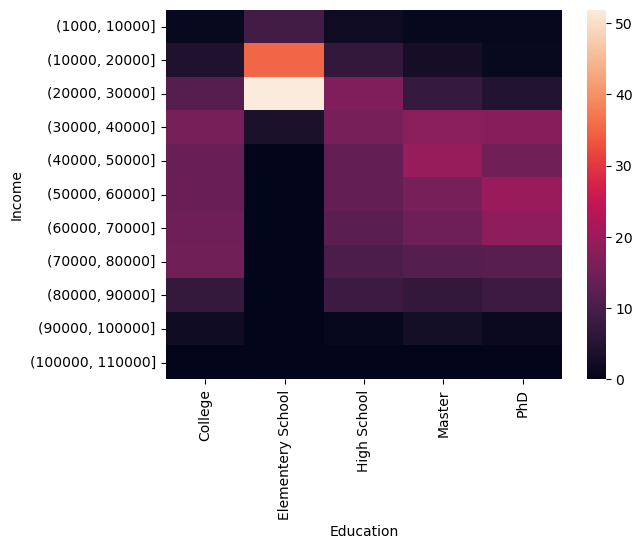

In [32]:
sns.heatmap(income_bracket_count)

In [33]:
df[(df["Marital_Status"]=='Divorced') & (df['Education']=='PhD')].mean()['Income']

53096.61538461538

<AxesSubplot:>

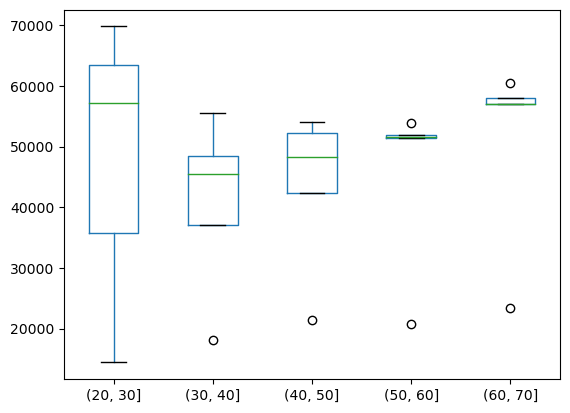

In [34]:
age = pd.cut(df['Age'], [20,30,40,50,60,70])
df.pivot_table('Income', index='Education', columns=age,aggfunc='mean').plot(kind='box')

In [35]:
df[['Age','Income']].corr()

,Age,Income
Age,1.000000,0.160899
Income,0.160899,1.000000


<AxesSubplot:xlabel='Age', ylabel='Income'>

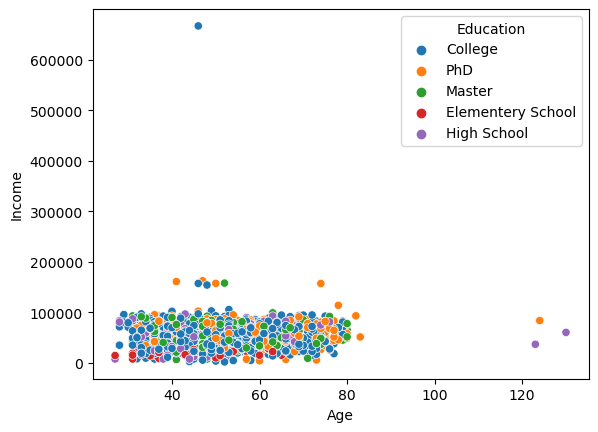

In [36]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Education')

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_spent,Age
0,5524,1957,College,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,66
1,2174,1954,College,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,69
2,4141,1965,College,In a Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,58
3,6182,1984,College,In a Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,42


In [80]:
# Comparing income with total spending
df[['Total_spent','Income']].corr()

,Total_spent,Income
Total_spent,1.000000,0.664775
Income,0.664775,1.000000


<AxesSubplot:xlabel='Income', ylabel='Total_spent'>

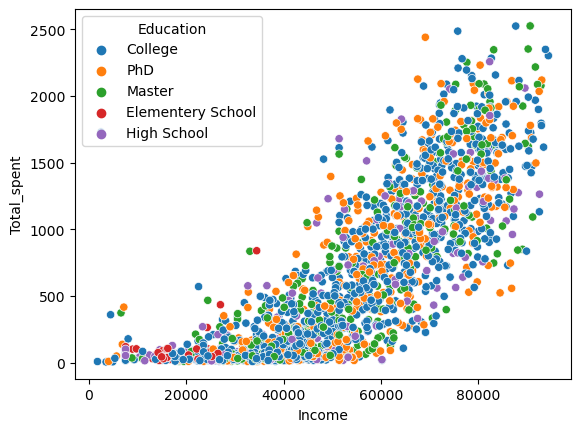

In [76]:
sns.scatterplot(data=df,x=income_subset,y='Total_spent',hue='Education')

In [ ]:
# Clustering
